# Corporate Credit Rating Forecast using Machine Learning Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import seaborn as sns


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load the processed data directly
input_data = pd.read_csv('./input_corporate_rating.csv')
input_data.head()

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,2,0.040496,0.310105,0.367135,0.865746,2.530468,2.457283,2.932322,2.366888,...,2.278827,2.892300,-0.063314,-1.794528,2.699027,2.457283,2.401567,0.270644,0.815123,0.597818
1,3,2,0.060134,0.323287,0.498169,0.863098,2.530496,2.457281,2.932295,2.366906,...,2.278272,2.892673,-0.063156,-1.753598,2.698882,2.457281,2.401498,0.270657,0.815948,0.598335
2,3,2,0.044558,0.314758,0.399070,0.869096,2.530448,2.457265,2.932154,2.366882,...,2.278878,2.892570,-0.063063,-1.776295,2.699041,2.457265,2.401964,0.270764,0.816635,0.595537
3,3,2,0.057122,0.325481,0.467584,0.864203,2.530398,2.457066,2.931202,2.366822,...,2.285724,2.890202,-0.063998,-1.769110,2.698963,2.457066,2.401223,0.270331,0.812212,0.601430
4,3,2,0.043226,0.322780,0.425078,0.867545,2.530491,2.457298,2.932353,2.366902,...,2.278673,2.892349,-0.063286,-1.770084,2.699027,2.457298,2.401710,0.270653,0.815068,0.597556


# Training and Test Data

We split our training and test data using `train_test_split()` from `sklearn.model_selection`

In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(input_data, test_size=0.2, random_state = 2996)

In [4]:
X_train, y_train = train_df.iloc[:,1:27], train_df.iloc[:,0]
X_test, y_test = test_df.iloc[:,1:27], test_df.iloc[:,0]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train.value_counts()

(1616, 26) (1616,)
(405, 26) (405,)


0    636
3    535
2    394
1     51
Name: Rating, dtype: int64

# Models

In [5]:
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    'Logistic Regression': LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 3),
    'Support Vector Machine': svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBRegressor(objective ='multi:softmax', num_class=4),
    'Random Forest':  RandomForestClassifier(random_state=1234),
    'Multilayer Perceptron': MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
}

predictions = []
accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    predictions.append((model_name, y_pred))
    accuracies.append((model_name, accuracy))

    print(f"{model_name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.39753086419753086
K-Nearest Neighbors Accuracy: 0.5851851851851851
Support Vector Machine Accuracy: 0.5111111111111111
Gaussian Naive Bayes Accuracy: 0.22962962962962963
XGBoost Accuracy: 0.7037037037037037
Random Forest Accuracy: 0.7012345679012346
Multilayer Perceptron Accuracy: 0.3851851851851852


# Results

C:\Users\moni2\AppData\Local\Temp\ipykernel_33660\817165657.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


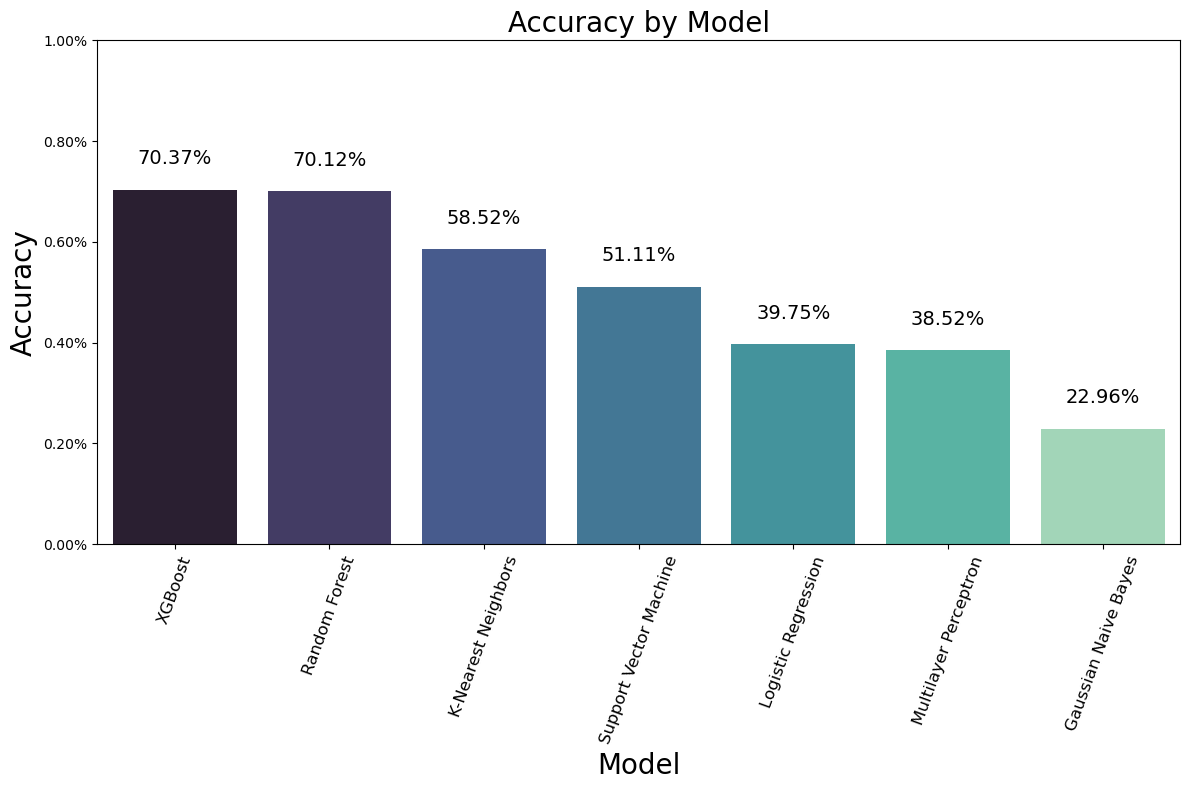

In [6]:
df_accuracy = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
model_list = list(df_accuracy['Model'])

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
ax = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="mako")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
# plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()

## Confusion Matrix

In [7]:
df_predictions = pd.DataFrame(predictions, columns=['Model', 'Predictions'])
df_predictions
list(df_predictions.iloc[4][1])


[3.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 3.0,
 2.0,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.0,
 3.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 3.0,
 0.0,
 2.0,
 3.0,
 0.0,
 3.0,
 2.0,
 0.0,
 3.0,
 3.0,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 3.0,
 2.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 3.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 0.0,
 3.0,
 2.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0

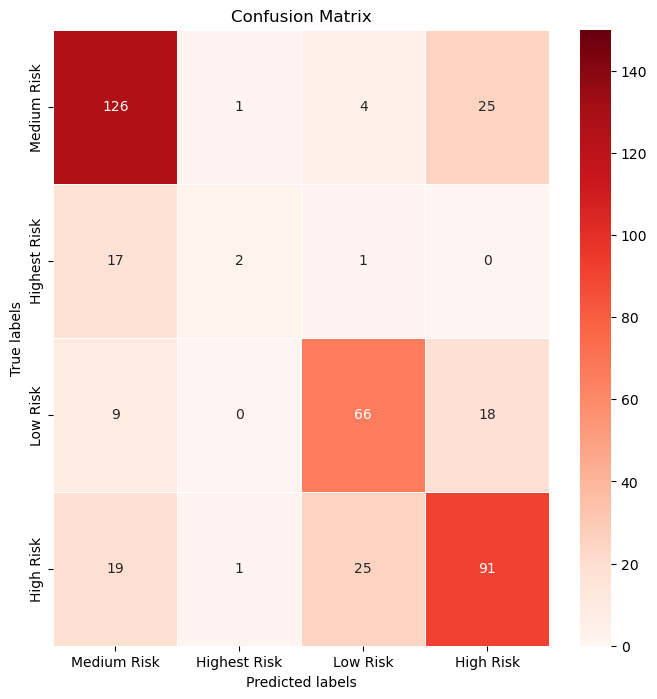

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, list(df_predictions.iloc[4][1]))

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds") # annot=True to annotate cells

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk'])
ax.yaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']);

plt.show()

In [9]:
print(classification_report(y_test, list(df_predictions.iloc[4][1]), target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.74      0.81      0.77       156
Highest Risk       0.50      0.10      0.17        20
    Low Risk       0.69      0.71      0.70        93
   High Risk       0.68      0.67      0.67       136

    accuracy                           0.70       405
   macro avg       0.65      0.57      0.58       405
weighted avg       0.69      0.70      0.69       405



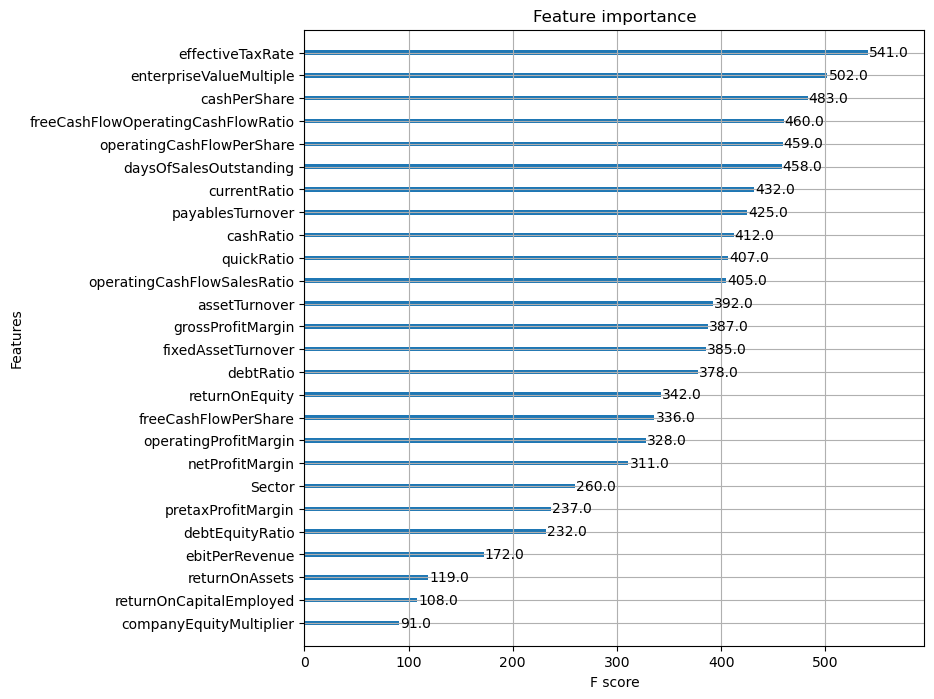

In [10]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))

plot_importance(models.get('XGBoost'), ax=ax)
plt.show()

# SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'your_minority_class' with the actual minority class label

# Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=29)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

0    636
3    636
2    636
1    636
Name: Rating, dtype: int64

# Hyperparameter Optimisation

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'C': np.logspace(-3, 3, 7),
        'multi_class': ['multinomial']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Support Vector Machine': {},
    #     # 'C': np.logspace(-3, 3, 7),
    #     'gamma': [0.1, 0.5, 1, 2],
    #     'kernel': ['linear', 'rbf', 'poly']
    # },
    'Gaussian Naive Bayes': {},
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Multilayer Perceptron': {}
    #     'hidden_layer_sizes': [(5, 5, 5), (10, 10, 10)],
    #     'activation': ['logistic', 'tanh', 'relu'],
    #     'solver': ['adam', 'lbfgs'],
    #     # 'max_iter': [100, 200, 500]
    # }
}

predictions = []
accuracies = []

# Perform hyperparameter optimization for each model
for model_name, model in models.items():

    # Get the hyperparameter grid for the current model
    param_grid = param_grids.get(model_name, {})
    
    # Create StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=10,  # Adjust as needed
        scoring='accuracy',
        n_jobs=-1,
        cv=cv,
        random_state=42
    )

    # Fit the model to find the best hyperparameters
    random_search.fit(X_train, y_train)

    # Get the best model with optimal hyperparameters
    best_model = random_search.best_estimator_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Store predictions and accuracies
    predictions.append((model_name, y_pred))
    accuracies.append((model_name, accuracy))

    print(f"Best Hyperparameters for {model_name}: {random_search.best_params_}")
    print(f"{model_name} Accuracy: {accuracy}\n")


c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status

Best Hyperparameters for Logistic Regression: {'solver': 'newton-cg', 'multi_class': 'multinomial', 'C': 100.0}
Logistic Regression Accuracy: 0.4246913580246914

Best Hyperparameters for K-Nearest Neighbors: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
K-Nearest Neighbors Accuracy: 0.6172839506172839



c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Support Vector Machine: {}
Support Vector Machine Accuracy: 0.5111111111111111

Best Hyperparameters for Gaussian Naive Bayes: {}
Gaussian Naive Bayes Accuracy: 0.22962962962962963



c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
XGBoost Accuracy: 0.7209876543209877

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Random Forest Accuracy: 0.671604938271605



c:\Users\moni2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Multilayer Perceptron: {}
Multilayer Perceptron Accuracy: 0.3851851851851852

